# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [163]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [164]:
df = pd.read_csv("/content/tmdb_5000_movies TMDL 2025.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

homepage has null values. Precisely 4803 - 1712 = 3091. --> cannot exstimate it

overview has 3 missing values -->

release date has 1 missing value -->

runtime has 2 missing values -->

tagline has 844 missing values -->



### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [166]:
df = df[["title", "overview", "genres"]] #why do we put 2 square braquets?
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [167]:
df = df.dropna() # drop na values
df = df.reset_index(drop=True) # reset index - the index is reset and starts with value 0
df

,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...,...,...
4795,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4796,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4797,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."
4798,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[]


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [168]:
np.random.seed(0)

# is this if there are many genres, they only choose one?
def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre


# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    label = label
    out = np.zeros(len(unique_labels))

    for word in label.split(","):
      out[unique_labels.index(word)] = 1

    return out

# save genres
processed_genres = []
for index, row in df.iterrows():                                    # check how this works
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):                                 #tqdm() gives you the progress and time it has taken
                                                                                      # you can also use %timeit and it will tell you once finished, how long it took
    encoded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = encoded_labels


100%|██████████| 4800/4800 [00:00<00:00, 9350.22it/s]


Verify that one-hot encodings are indeed as expected

In [169]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4800/4800 [00:00<00:00, 16647.45it/s]


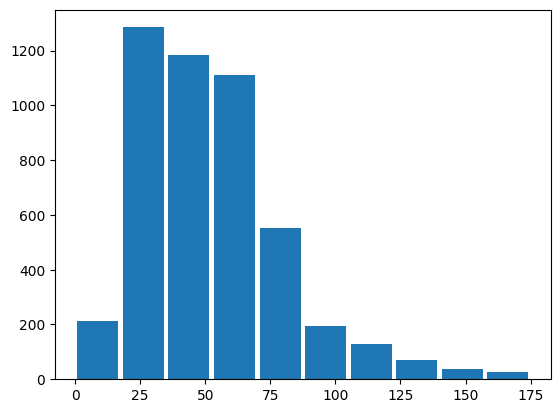

In [170]:
import re
def remove_punctuation(text):

    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total=len(df)):                                 # if do df.iteritems() instead of df.iterrows() it will iterate over the columns
  processed_overviews.append(remove_punctuation(row["overview"]))

# why does this not work:

for i in range(0, len(processed_overviews)):
  processed_overviews[i] = processed_overviews[i].lower()                             # note you cannot just write processed_overviews[i].lower() bc it won't change the df itself

# print(processed_overviews)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list

overview_lens = []
for i in range(len(df)):
  length = len(processed_overviews[i].split())                                        # if you do not put .spli() it would count the number. of characters (letters and spaces)
  overview_lens.append(length)

"""
for index, row in tqdm(df.iterrows(), total=len(df)):
  length = len(processed_overviews[index])                                            # why is it red?
  overview_lens.append(length)
"""

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens, bins=10, rwidth=0.9)                                          # you can also put bins = 'auto' and it does the width automatically --> more descriptive
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [171]:
length_list = df['overview_len'].tolist()

print("shortest overview has length: ", min(length_list))
# print(df["overview_len"].min())                                                       -- other way to get minimum value


print("longest overview has length: ", max(df['overview_len']))

print("first quantile cut off length is: ", np.quantile(df['overview_len'], 0.25))

print("third quantile cut off length is: ", np.quantile(df['overview_len'], 0.75))

# print("last quantile cut off length is: ", np.quantile(df['overview_len'], 1))       -- this gives you max value too

print("10 percent cut off length is: ", np.quantile(df['overview_len'], 0.10))

above900 = 0
below174 = 0
above381 = 0
above15 = 0

for length in df['overview_len']:
  if length >= 15:
    above15 += 1


print("how many movies with more 15 length overview: ", above15)

"""
for index, row in df.iterrows():
  if row['overview_len'] == 23:
    print(row['proc_overview'])
"""


shortest overview has length:  0
longest overview has length:  175
first quantile cut off length is:  30.0
third quantile cut off length is:  67.0
10 percent cut off length is:  22.0
how many movies with more 15 length overview:  4707


"\nfor index, row in df.iterrows():\n  if row['overview_len'] == 23:\n    print(row['proc_overview'])\n"

*Your text answer here*

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [172]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len

df = df[df['overview_len'] >= token_len]

short_overviews = []

for index, row in df.iterrows():
  split_list = row['proc_overview'].split()
  to_add = []

  for word in split_list:
    to_add.append(word)
    if len(to_add) == token_len:
      break

  sentence = " ".join(to_add)
  short_overviews.append(sentence)

df["proc_overview"] = short_overviews

df = df.reset_index(drop=True)
                                              # do not forget to reindex after you remove some rows !!!
df


<ipython-input-172-e1c08e3dea0e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = short_overviews


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,55
...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,115
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,62
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,73
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,65


In [173]:
# this code sets all overview lengths to 15

overview_lens_new = []
for index, row in df.iterrows():
  split_list = row['proc_overview'].split()
  length = len(split_list)
  overview_lens_new.append(length)


df["overview_len"] = overview_lens_new
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,15
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,15
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,15
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,15
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,15
...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,15
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,15
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,15
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,15


In [80]:
# i do not understand why these for loops do not work

"""
# example: chunks = [data[x:x+100] for x in range(0, len(data), 100)]
list_of_words = list()
cut_overviews = []

for index, row in df.iterrows():
"""

"""
for index, row in df.iterrows():
  added = 0
  for word in row['proc_overview']:
    list_of_words.append(word)
    added =+ 1
    if added == 15:
      continue
"""
#print(list_of_words)

#list_of_lists = [list_of_words[i: i+15] for i in range(0, len(list_of_words), 15)]

#df["proc_overview"] = list_of_lists

# why does this not work ???
"""
eliminatedRows = 0

for index, row in df.iterrows():
  value = row['overview_len']
  if value == 172:
    df = df.drop(index)                                                             # if you do "" df.at(i, 'overview_len') = 0 "" then you change that value to 0
"""

"""
eliminatedRows = 0

for i in range(len(df)):
  if df['overview_len'][i-eliminatedRows] == 172:
    eliminatedRows =+ 1
    df = df.drop(i-eliminatedRows)
"""

#las tres comillas se usan para hacer un block comment
"""
eliminatedRows = 0

for i in df.index:
  ind = i-eliminatedRows
  val = df['overview_len'].iloc[ind]
  if val < token_len:
    eliminatedRows =+ 1
    df.drop(index=ind)
"""

# split each proc_overview into a list of words, select the first token_len words,
"""
sublists = []
list_of_words = list()
for index, row in df.iterrows():
  sublists.append((df.iat[index - 1, 6].split()[:15]))
"""
  # alternative way not working bc then splits based on letters not words
"""
  for w in range(0, 15):
    word = row['proc_overview'][w]
    list_of_words.append(word)

    # the below splits per letter not word
    sublists = [list_of_words[i:i + 15] for i in range(0, len(list_of_words), 15)]
"""

# and add the list of words back into df["proc_overview"]

#df["proc_overview"] = list_of_lists

# print to verify
#df["proc_overview"]
#df


"\n  for w in range(0, 15):\n    word = row['proc_overview'][w]\n    list_of_words.append(word)\n\n    # the below splits per letter not word\n    sublists = [list_of_words[i:i + 15] for i in range(0, len(list_of_words), 15)]\n"

### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [174]:
# hint: store all words for all movies in a set, change it to a list and sort

setWords = set()
listAllWords = list

for index, row in tqdm(df.iterrows(), total = len(df)):
  split_list = row['proc_overview'].split()

  for word in split_list:
    setWords.add(word)

unique_words = sorted(list(setWords))


vocab_len = len(unique_words)
print("\n vocab length = ", vocab_len)

100%|██████████| 4707/4707 [00:00<00:00, 7452.80it/s]


 vocab length =  12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [175]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same

def encode_sentence(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    label = label.split()
    out = np.zeros(len(unique_labels))

    for word in label:
      out[unique_labels.index(word)] =  out[unique_labels.index(word)] + 1

    return out


encoded_labels = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = row['proc_overview'] # set of encodings for this overview
    # get encoding for this word
    sentence_encode = encode_sentence(sentence_encode, unique_words) # sum over axis=1  ????
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:18<00:00, 251.72it/s]


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4702    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4703    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4704    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4705    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4706    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4707, dtype: object

In [84]:
print(len(df["one_hot_overview"][0]))
print(sum(df["one_hot_overview"][0]))
print(df["proc_overview"][0])

12493
15.0
in the 22nd century a paraplegic marine is dispatched to the moon pandora on a


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

*Your answer here*

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

<ipython-input-180-f71513b82acd>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap='tab10', alpha=0.6, s=1)


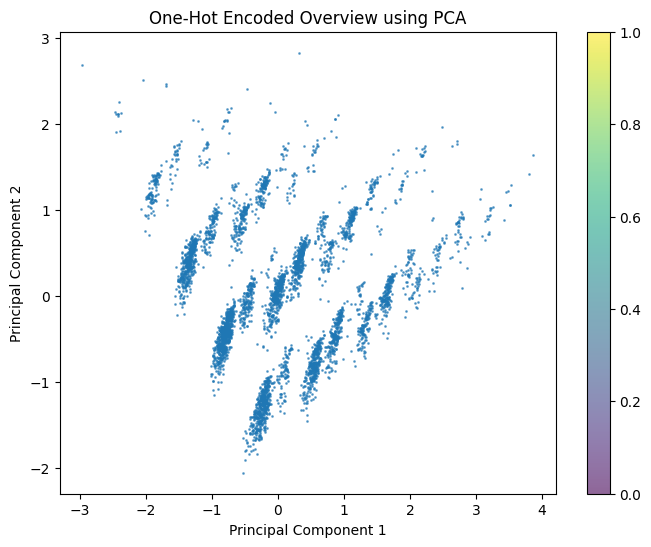

In [180]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# we did exactly this in the lecture notebook
#print(type(encoded_labels))
encoded_labels_array = np.array(encoded_labels)
#print(type(encoded_labels_array))
#print(encoded_labels_array.shape)                                                  # -1 means dimensions unknown and want numpy to figure it out
x_pca = pca.fit_transform(encoded_labels_array)

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('One-Hot Encoded Overview using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

--> Not really ????

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

In [181]:
print(pca.explained_variance_ratio_)

# pca.explained_variance_ratio_ gives you the percentage of the explained variance
# pca.explained_variance_      gives you the variance i.e. the eigenvalues of the covariance matrix

[0.0699188  0.04296571]


--> Summing up variance explianed of both ratios, a 2D PCA projections explains around 11% so loses approximately 89% for this dataset

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

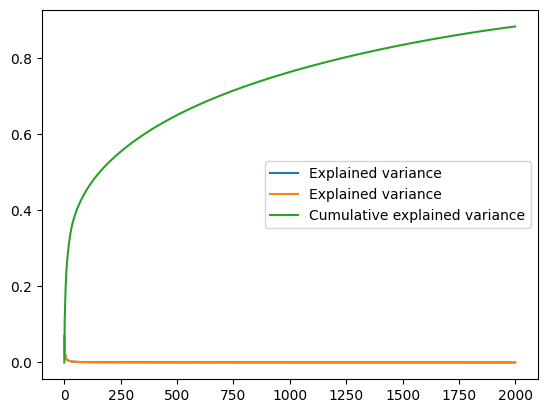

In [182]:
# Set up PCA object with the desired number of components
pca = PCA(n_components=2000)

# fit transform one_hot_overview encodings
labels_pca = pca.fit(np.array(encoded_labels))
# get explained variance ratio from object, store it in a list
expl_var_ratio = pca.explained_variance_ratio_                      # this is stored as a numpy.ndarray - but the rest works, why was a list necessary?
                                                                    # to store it as a list use .tolist()

plt.plot(expl_var_ratio, label="Explained variance")
# set up y label, x label, title
plt.plot(expl_var_ratio, label="Explained variance")
plt.plot([np.sum(expl_var_ratio[:i]) for i in range(len(expl_var_ratio)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

In [43]:
# print(type(expl_var_ratio))

<class 'numpy.ndarray'>


**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [183]:
for i in range(len(expl_var_ratio)-1):      # -1 bc for loop starts at 0
  cum_var = np.sum(expl_var_ratio[:i])
  if cum_var >= 0.8:
    print(i+1)                              # i + 1 bc for loop starts with i = 0
    break

1228


In order to explain 80% of the total variance in the data you need 1228 principal components

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [184]:
n_dims = 1228
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(np.array(encoded_labels_array))
df["overview_pca"] = labels_pca.tolist()
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275126127, 1.2545637565422918, 1.06..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37807293005890047, -1.593471849772435, 0.9..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490621913, 1.1768562611978999, 0.80..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741730522, -0.4484862837349327, 0.59..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365980398, -0.22882078000611725, 0..."
...,...,...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.16452917101861453, -0.3582876078237181, 0...."
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4396168512078571, -1.132957884799467, 0.369..."
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3907208334792586, 0.5742052146674028, -0.26..."
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.30154466232948773, -1.1754163046973007, 0...."


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

Rango


In [185]:
print(labels_pca.tolist()[0])

[0.17130556275126127, 1.2545637565422918, 1.0628744117602087, 0.8332442397260922, 0.8175444852999207, -0.22651613943329876, -0.378335289522389, 0.46953443443422965, 0.2115652560838499, -0.3369110105592989, 0.6492316571891924, -0.34655688138692353, 0.262721338410987, 0.28318781132002463, 0.04713388700906168, 0.028045359212153207, -0.10805547595194782, -0.04883742772462601, -0.023977900446095143, -0.07071760214364875, -0.1076599777221184, 0.0024201703218247926, -0.12594873852840485, 0.11793349477045194, 0.01401540865194204, 0.04525745410617314, 0.011194919862335858, -0.009121675351346935, -0.07369560573564228, -0.028253226582018353, -0.06060459903360928, -0.015826276739115852, -0.03590860992595337, -0.01912398615048836, 0.07852171603342749, -0.009767770684238987, 0.02186221058585924, -0.011391042978443443, -0.05971549164854126, -0.011683545185220617, -0.0358810202767923, 0.0011688075500354616, -0.01998616653204125, 0.030401439790209848, 0.043417635586795456, -0.004957622650510718, -0.055

In [186]:
# import KMeans class
from sklearn.cluster import KMeans

labels_pca_list = labels_pca.tolist()

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(labels_pca_list)

y_preds = kmeans.predict(labels_pca_list) # get predictions

df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_index = 0
cluster_indices = np.where(kmeans.labels_ == cluster_index)[0]
for index in cluster_indices:
  print(df['title'][index], " + ", df["proc_genres"][index])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spectre  +  Action
Battleship  +  Science Fiction
Shin Godzilla  +  Drama
Hulk  +  Action
Pirates of the Caribbean: The Curse of the Black Pearl  +  Fantasy
Total Recall  +  Adventure
The Princess and the Frog  +  Music
Town & Country  +  Comedy
Epic  +  Family
The Secret Life of Walter Mitty  +  Comedy
Mulan  +  Family
Rio  +  Family
Bicentennial Man  +  Comedy
Last Action Hero  +  Adventure
Jumper  +  Fantasy
Zookeeper  +  Comedy
50 First Dates  +  Comedy
The Terminal  +  Drama
Killers  +  Thriller
Hostage  +  Thriller
Snake Eyes  +  Mystery
Jarhead  +  Drama
The Majestic  +  Romance
Signs  +  Thriller
Stardust  +  Family
Dinner for Schmucks  +  Comedy
Cliffhanger  +  Thriller
Focus  +  Romance
Jurassic Park  +  Science Fiction
The Green Mile  +  Fantasy
Man on Fire  +  Thriller
Jingle All the Way  +  Comedy
The Soloist  +  Drama
Supernova  +  Science Fiction
Resident Evil: Afterlife  +  Science Fiction
Crimson Tide  +  Action
Disclosure  +  Romance
D-Tox  +  Action
Mamma Mia!  +  Co

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

Printing the title and genre we see that they are not clustered based on genre so I would say no.

For example, captain america and Thor seem to go well together as they are both but not with 'The Horse Whisperer' which is a Romance.

Furthermore, Batman is dlassified as a comedy so we could argue that the random selection of genre when there is more than one specified is not optimal and could alter the clustering results.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*Your text answer here*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

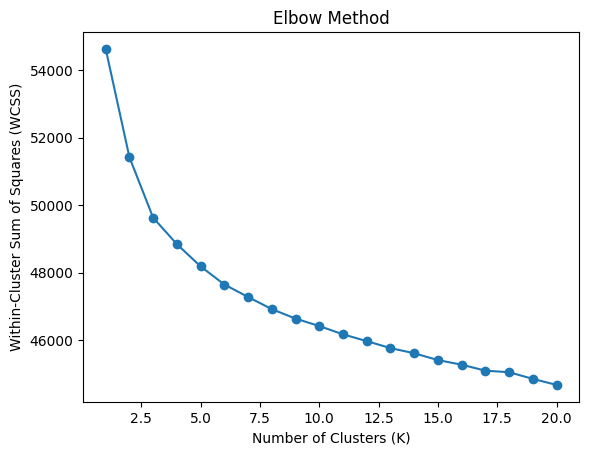

In [187]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_pca_list)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

--> I would choose 3 clusters

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [188]:
# import GMM class
from sklearn.mixture import GaussianMixture

# using - labels_pca_list

# Perform gmm clustering
gmm = GaussianMixture(20)
# fit model
gmm.fit(labels_pca_list)

y_preds_gmm = gmm.predict(labels_pca_list) # get predictions

df["cluster_gmm_means"] = y_preds_gmm # set predictions

# print(y_preds_gmm)


[11 19 12 ... 16 19 13]


In [189]:

# print out elements of cluster 0
cluster_index = 0
cluster_indices = np.where(y_preds_gmm == cluster_index)[0]
for index in cluster_indices:
  print(df['title'][index], " + ", df["proc_genres"][index])

Men in Black 3  +  Comedy
Skyfall  +  Action
Rush Hour 3  +  Thriller
Big Hero 6  +  Comedy
Terminator 3: Rise of the Machines  +  Action
The Chronicles of Narnia: The Voyage of the Dawn Treader  +  Adventure
Lethal Weapon 4  +  Action
The World Is Not Enough  +  Thriller
Puss in Boots  +  Family
After Earth  +  Action
Rio 2  +  Animation
Teenage Mutant Ninja Turtles: Out of the Shadows  +  Adventure
Mr. & Mrs. Smith  +  Drama
The Cat in the Hat  +  Fantasy
Little Fockers  +  Romance
The Mummy Returns  +  Fantasy
Sex and the City 2  +  Drama
Ice Age: Continental Drift  +  Comedy
The Spiderwick Chronicles  +  Fantasy
Rush Hour 2  +  Comedy
What Lies Beneath  +  Mystery
The Holiday  +  Comedy
It's Complicated  +  Romance
Scooby-Doo  +  Mystery
Eagle Eye  +  Thriller
The Legend of Zorro  +  Action
Looney Tunes: Back in Action  +  Animation
The Invasion  +  Thriller
Independence Day  +  Science Fiction
The Lost World: Jurassic Park  +  Action
Grown Ups  +  Comedy
Munich  +  Thriller
Carrie

In [125]:
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm_means
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the 22nd century a paraplegic marine is dis...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.17130556275126288, 1.2545637565423908, 1.06...",14,4
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",captain barbossa long believed to be dead has ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3780729300588525, -1.5934718497722413, 0.9...",15,3
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a cryptic message from bonds past sends him on...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.9128810490622774, 1.1768562611985747, 0.80...",11,6
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",following the death of district attorney harve...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8229543741730964, -0.44848628373444027, 0.5...",9,13
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",john carter is a warweary former military capt...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.10117960365981549, -0.22882078000686126, 0...",2,15
...,...,...,...,...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",adam a security guard travels from california ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.16452917101866676, -0.3582876078236258, 0....",19,8
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",el mariachi just wants to play his guitar and ...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.43961685120776584, -1.1329578847993496, 0.3...",6,19
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",signed sealed delivered introduces a dedicated...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.39072083347928843, 0.574205214667021, -0.26...",1,11
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when ambitious new york attorney sam is sent t...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3015446623294588, -1.1754163046974895, 0.7...",2,3


In [190]:
print(min(df['cluster_gmm_means']))
print(max(df['cluster_gmm_means']))

0
19


**Q5.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

--> It seems there is an improvement compared to k-means clustering as it seems that this cluster is majoritarily composed of films with genre comedy, drama and romance.

**Q5.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

In [191]:
print(np.arange(1,21)) # array from 1 to n-1
print(np.arange(20))   # array with n elements, but starts at 0 so until n-1

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


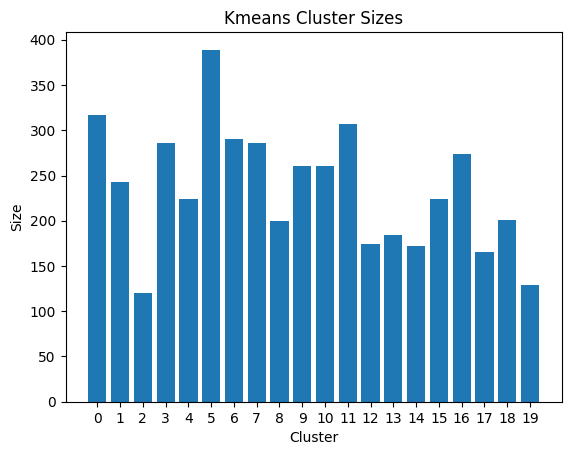

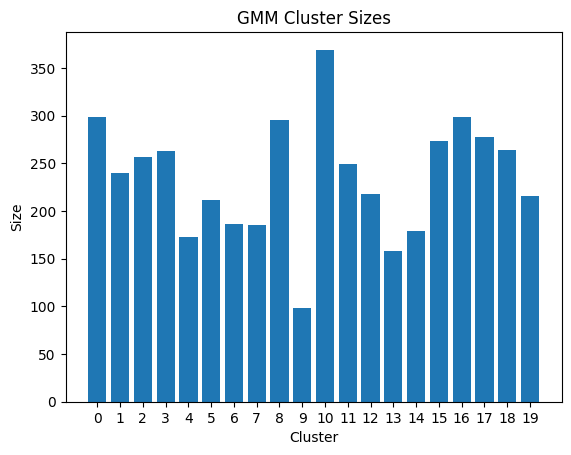

In [192]:
# Create an array for the x-axis positions
numberOfClusters = np.arange(0, 20)           # tienes que hacer mas uno porque el 'histogram' se hace in terms of intervals ???

clustersizes_Kmeans = np.bincount(y_preds)

fig, ax2 = plt.subplots()
# Plotting the bars
ax2.bar(numberOfClusters, clustersizes_Kmeans)
# Add labels, title, and legend
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Size')
ax2.set_title('Kmeans Cluster Sizes')
ax2.set_xticks(numberOfClusters)
ax2.set_xticklabels(numberOfClusters)
plt.show()


clustersizes_gmm = np.bincount(y_preds_gmm)

fig, ax = plt.subplots()
# Plotting the bars
ax.bar(numberOfClusters, clustersizes_gmm)
# Add labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
ax.set_title('GMM Cluster Sizes')
ax.set_xticks(numberOfClusters)
ax.set_xticklabels(numberOfClusters)
plt.show()


**Q5.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

--> If the question is comparing K-means clustering versus GMM-clustering:

- There is no significant differnece in the maximum size of clusters between methods

- There is significant differnece in the sizes of clusters within each method of clustering.

- More notably on GMM

- K-means clusters seem more uniform


# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [193]:
prev_watch = "Avatar"

# what row index avatar is:
index_prev_watch = df.index[df['title']==prev_watch].tolist()

#print(index)
#print("index is: ", index[0])



cluster_kmeans = df['cluster_kmeans'][index_prev_watch]          # find what cluster index Avatar falls into for k-means
cluster_gmm = df['cluster_gmm_means'][index_prev_watch]           # find what cluster index Avatar falls into for gmm

"""
print(cluster_kmeans)
print(cluster_gmm)

print(cluster_kmeans[0])
"""

0    4
Name: cluster_kmeans, dtype: int32
0    11
Name: cluster_gmm_means, dtype: int64
4


In [194]:
# print a few movies in same k-means cluster as Avatar
cluster_index = cluster_kmeans[0]
cluster_indices = np.where(kmeans.labels_ == cluster_index)[0]
printed = 0
print("10 movies in same K-means cluster: \n")
for index in cluster_indices:
  print(df['title'][index])
  printed += 1
  if printed == 10:
    break


cluster_index = cluster_gmm[0]
cluster_indices = np.where(y_preds_gmm == cluster_index)[0]
printed = 0
print("\n10 movies in same GMM-means cluster: \n")
for index in cluster_indices:
  print(df['title'][index])
  printed += 1
  if printed == 10:
    break


10 movies in same K-means cluster: 

Avengers: Age of Ultron
Hancock
Pan
Mr. Peabody & Sherman
Beowulf
Clash of the Titans
Windtalkers
Speed 2: Cruise Control
The Martian
The Emperor's New Groove

10 movies in same GMM-means cluster: 

Avatar
John Carter
X-Men: The Last Stand
Oz: The Great and Powerful
The Jungle Book
The Polar Express
The Sorcerer's Apprentice
I Am Legend
X-Men Origins: Wolverine
The Matrix Reloaded


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

--> No for the reasons stated above

**Q6.3** How would you try making the recommender systems better?

--> Make sure that the genre is the same too, or adding other explanatory variables such as actors, ratings, country,  director, etc.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

--> Considering all of the clusters the movies he has watched are from.

Maybe add a variable that clusters movies that he has watched and find similarities.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [195]:
def cosine_sim(v1, v2):
  dot_product = np.dot(v1, v2)
  length1 = np.linalg.norm(v1)
  length2 = np.linalg.norm(v2)
  sim = dot_product/(length1 * length2)
  return sim

# get overview_pca encoding of previously watched film
prev_watch_enc = df['overview_pca'][index_prev_watch]

#print(prev_watch_enc)

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    #print(row['overview_pca'])
    sims.append(cosine_sim(prev_watch_enc[0], row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values('cos_sim_to_avatar') # sort df
df # print to verify


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm_means,cos_sim_to_avatar
436,Four Christmases,Brad and Kate have made something of an art fo...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",brad and kate have made something of an art fo...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.44565897020918777, -0.6651103383787927, -1....",5,10,-0.338088
3495,A Room for Romeo Brass,"Two twelve-year-old boys, Romeo and Gavin, und...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",two twelveyearold boys romeo and gavin undergo...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0929736429140548, -1.2254547025332276, -1.4...",10,9,-0.330076
16,The Avengers,When an unexpected enemy emerges and threatens...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when an unexpected enemy emerges and threatens...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09052639496235812, -1.212853524992136, -1.4...",10,9,-0.328435
4544,The Incredibly True Adventure of Two Girls In ...,An adventurous love story between two young wo...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Romance,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",an adventurous love story between two young wo...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14070632835146624, -0.8539432716626321, -0....",10,10,-0.328115
4680,Clerks,Convenience and video store clerks Dante and R...,"[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",convenience and video store clerks dante and r...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.08713832865039899, -1.3584901561682323, -2....",10,9,-0.321470
...,...,...,...,...,...,...,...,...,...,...,...,...
411,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",in the future america is a dystopian wasteland...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23152067361940482, 1.4016470372922334, 0.35...",4,2,0.454595
1272,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the nomad is a historical epic set in 18thcent...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.25023301021240213, 1.4192751540293735, 0.33...",4,2,0.472424
3725,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",sam ellis is a man on the rise a hotshot feder...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21497561521975783, 1.408547801772942, 0.514...",4,14,0.475051
3318,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a warlock flees from the 17th to the 20th cent...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.142851636745392, 1.194036029571505, 1.00924...",4,11,0.533070


It is hard to tell if it is better. But the highest similarity score is only around 0.5 and is a different genre, i.e. Fantasy instead of Action. Furthermore if we read the overview it is based on the 17th to 20th century while Avatar is based on the 22nd century.

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [196]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [ ]:
# your code here: feel free to add extra cells


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)